**1. СКОРОСТИ СХОДИМОСТИ** 

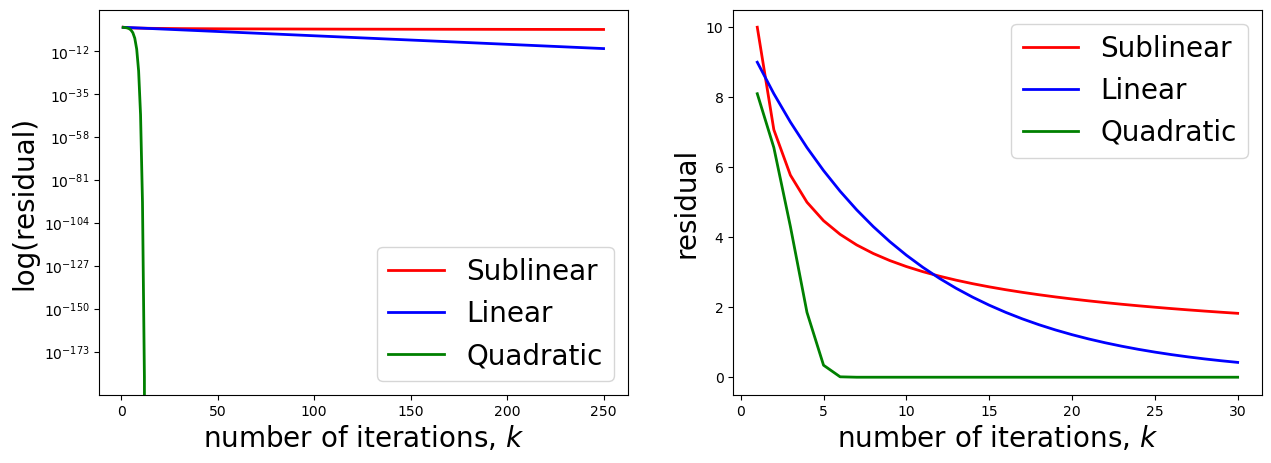

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# константа C в скорости сходимости
C = 10

# коэффициент q в скорости сходимости
q = 0.9

# степень p в сублинейной скорости сходимости
p = 0.5

# сублинейная скорость сходимости
sublinear = np.array([C * k**(-p) for k in range(1, 1000)])

# линейная скорость сходимости
linear = np.array([C * q**k for k in range(1, 1000)])

# квадратичная скорость сходимости
quadratic = np.array([C * q**(2**k) for k in range(1, 1000)])

plt.figure(figsize=(15,5))

# линейный масштаб
plt.subplot(122)
N = 30
plt.plot(np.arange(1, N+1), sublinear[0:N], color='red', label=r"Sublinear", linewidth=2)
plt.plot(np.arange(1, N+1), linear[0:N], color='blue', label=r"Linear", linewidth=2)
plt.plot(np.arange(1, N+1), quadratic[0:N], color='green', label=r"Quadratic", linewidth=2)
plt.xlabel("number of iterations, $k$", fontsize=20)
plt.ylabel("residual", fontsize=20)
plt.legend(loc="best", fontsize=20)

# логарифмический масштаб
plt.subplot(121)
N = 250
plt.semilogy(np.arange(1, N+1), sublinear[0:N], color='red', label=r"Sublinear", linewidth=2)
plt.semilogy(np.arange(1, N+1), linear[0:N], color='blue', label=r"Linear", linewidth=2)
plt.semilogy(np.arange(1, N+1), quadratic[0:N], color='green', label=r"Quadratic", linewidth=2)
plt.xlabel("number of iterations, $k$", fontsize=20)
plt.ylabel("log(residual)", fontsize=20)
plt.legend(loc="best", fontsize=20)

**2. ОДНОМЕРНАЯ ОПТИМИЗАЦИЯ**

**2.1 ЦЕЛЕВАЯ ФУНКЦИЯ**

Text(0, 0.5, 'f(x)')

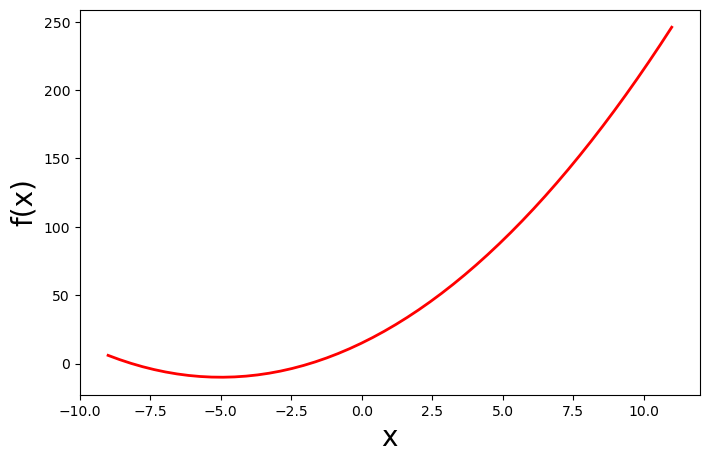

In [13]:
function = lambda x: (x + 5)**2 - 10
a = -9
b = 11
opt = -5 # решение x^*, находится с помощью солвера SCIPY (см.ниже)


plt.figure(figsize=(8,5))
plt.plot(np.linspace(a,b), function(np.linspace(a,b)), color='red', linewidth=2)
plt.xlabel("x", fontsize=20)
plt.ylabel("f(x)", fontsize=20)

**ЗНАКОМСТВО с солвером [SCIPY](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#defining-bounds-constraints)**

In [31]:
from scipy import optimize
from scipy.optimize import Bounds

# Ограничения
bounds = Bounds([-9], [11])

# Определение функции
def f(x):
    return (x + 5)**2 - 10

# Минимизация
x_min = optimize.minimize(f, [b], bounds=bounds) # аргументы (фуникция, начальная точка, ограничения)
print(x_min)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -10.0
        x: [-5.000e+00]
      nit: 2
      jac: [ 0.000e+00]
     nfev: 6
     njev: 3
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>


**2.2 МЕТОД ДЕЛЕНИЯ ОТРЕЗКА ПОПОЛАМ**

In [35]:
def dichotomy_method(a, b, function, eps, N, opt):
    c_hist = []
    c = (a + b) / 2.0
    c_hist.append(c)
    #while abs(b - a) > eps:  # критерий остановки - точность(eps)
    for i in range(N-1):      # критерий остановки - число итераций(N)
        y = (a + c) / 2.0
        if function(y) <= function(c):
            b = c
            c = y
        else:
            z = (b + c) / 2.0
            if function(c) <= function(z):
                a = y
                b = z
            else:
                a = c
                c = z
        c_hist.append(c)
        residual = abs(c - opt)
    return c_hist, residual

In [36]:
# Запуск метода деления отрезка пополам

eps = 1e-3 # точность
N = 20  # число итераций
ans_d, res_d = dichotomy_method(a, b, function, eps, N, opt)
print("Метод деления отрезка пополам достигает точности = {}".format(res_d), "в точке = {}".format(ans_d[-1]), "после N = {}".format(N), "итераций")

Метод деления отрезка пополам достигает точности = 3.814697265625e-06 в точке = -5.000003814697266 после N = 20 итераций


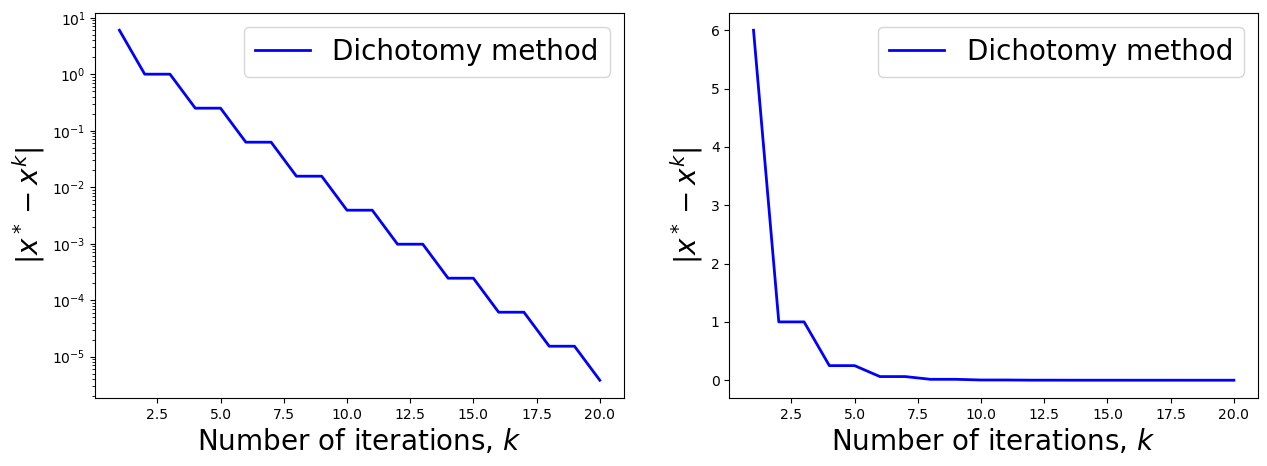

In [37]:
# Графики сходимости метода деления отрезка пополам

plt.figure(figsize=(15,5))

# линейный масштаб
plt.subplot(122)
plt.plot(np.arange(1, len(ans_d) + 1), np.abs(opt - np.array(ans_d)), color='blue', linewidth=2, label="Dichotomy method")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=20)

# логарифмический масштаб
plt.subplot(121)
plt.semilogy(np.arange(1, len(ans_d) + 1), np.abs(opt - np.array(ans_d)), color='blue', linewidth=2, label="Dichotomy method")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=20)

**2.3 МЕТОД ЗОЛОТОГО СЕЧЕНИЯ**

In [39]:
def golden_section_search(a, b, function, eps, N, opt):
    c_hist = []
    c_hist.append((a + b) / 2.0)
    t = (np.sqrt(5) + 1) / 2.0
    y = a + (b - a) / t**2
    z = a + (b - a) / t
    #while abs(b - a) > eps: # критерий остановки - точность(eps)
    for i in range(N-1):     # критерий остановки - число итераций(N) 
        if function(y) <= function(z):
            b = z
            z = y
            y = a + (b - a) / t**2
        else:
            a = y
            y = z
            z = a + (b - a) / t
        c_hist.append((a + b) / 2.0)
        residual = abs(c_hist[-1] - opt)
    return c_hist, residual

In [40]:
# Запуск метода золотого сечения

eps = 1e-3 # точность
N = 20  # максимальное количество итераций
ans_g, res_g = golden_section_search(a, b, function, eps, N, opt)
print("Метод золотого сечения достигает точности = {}".format(res_g), "в точке = {}".format(ans_g[-1]), "после N = {}".format(N), "итераций")

Метод золотого сечения достигает точности = 1.1921721972285582e-05 в точке = -5.000011921721972 после N = 20 итераций


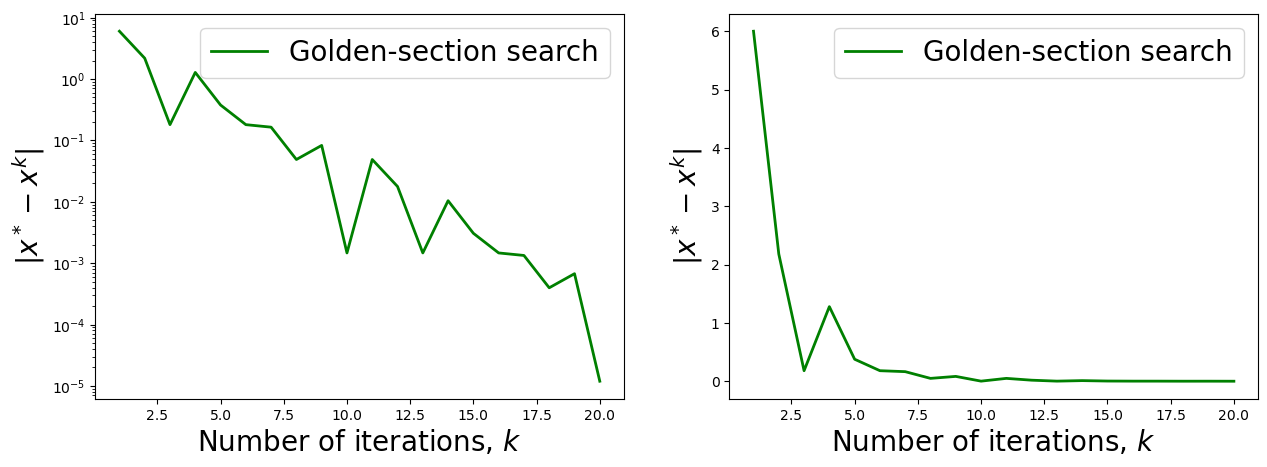

In [41]:
# Графики сходимости метода золотого сечения

plt.figure(figsize=(15,5))

# линейный масштаб
plt.subplot(122)
plt.plot(np.arange(1, len(ans_g) + 1), np.abs(opt - np.array(ans_g)), color='green', linewidth=2, label="Golden-section search")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=20)

# логарифмический масштаб
plt.subplot(121)
plt.semilogy(np.arange(1, len(ans_g) + 1), np.abs(opt - np.array(ans_g)), color='green', linewidth=2, label="Golden-section search")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=20)

**3. СРАВНЕНИЕ МЕТОДОВ**

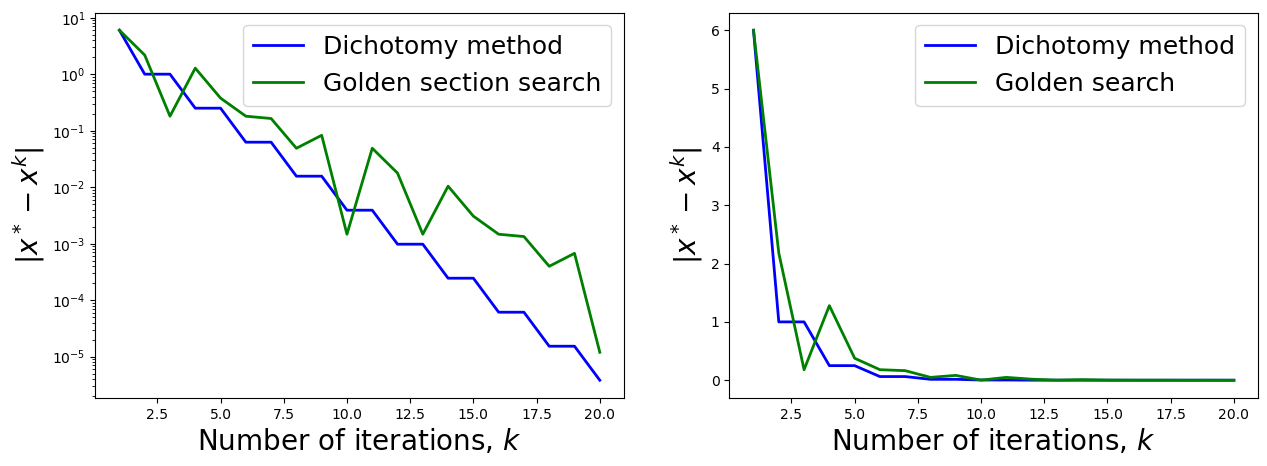

In [43]:
plt.figure(figsize=(15,5))

# линейный масштаб
plt.subplot(122)
plt.plot(np.arange(1, len(ans_d) + 1), np.abs(opt - np.array(ans_d)), color='blue', linewidth=2, label="Dichotomy method")
plt.plot(np.arange(1, len(ans_g) + 1), np.abs(opt - np.array(ans_g)), color='green', linewidth=2, label="Golden search")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=18)

# логарифмический масштаб
plt.subplot(121)
plt.semilogy(np.arange(1, len(ans_d) + 1), np.abs(opt - np.array(ans_d)), color='blue', linewidth=2, label="Dichotomy method")
plt.semilogy(np.arange(1, len(ans_g) + 1), np.abs(opt - np.array(ans_g)), color='green', linewidth=2, label="Golden section search")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=18)

In [44]:
print('После 20 итераций метод деления отрезка пополам достиагет лучшую точность', np.round(res_d,6), ', чем метод золотого сечения', np.round(res_g,6), '.')

После 20 итераций метод деления отрезка пополам достиагет лучшую точность 4e-06 , чем метод золотого сечения 1.2e-05 .


**2.4 [МЕТОД ФИБОНАЧЧИ](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%A4%D0%B8%D0%B1%D0%BE%D0%BD%D0%B0%D1%87%D1%87%D0%B8#:~:text=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20%D0%A4%D0%B8%D0%B1%D0%BE%D0%BD%D0%B0%D1%87%D1%87%D0%B8%5B%D0%BF%D1%80%D0%B0%D0%B2%D0%B8%D1%82%D1%8C%5D,%D0%BA%D0%B0%D0%B6%D0%B4%D0%BE%D0%B9%20%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D1%8E%D1%89%D0%B5%D0%B9%20%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%20%D0%BF%D0%BE%20%D0%BE%D0%B4%D0%BD%D0%BE%D0%BC%D1%83.)**

# ============================================================


# С помощью солвера SCIPY найдите минимум данных функций на предложенных отрезках (opt).

Text(0, 0.5, 'f(x)')

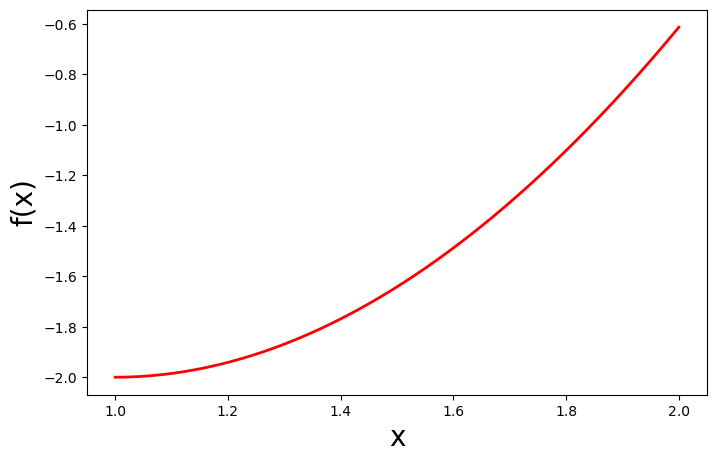

In [58]:
function = lambda x: (x**2)-(3*x)+x*np.log(x)
a = 1
b = 2
opt = 1 # решение x^*, находится с помощью солвера SCIPY (см.ниже)


plt.figure(figsize=(8,5))
plt.plot(np.linspace(a,b), function(np.linspace(a,b)), color='red', linewidth=2)
plt.xlabel("x", fontsize=20)
plt.ylabel("f(x)", fontsize=20)

In [59]:
bounds = Bounds([1], [2])

# Определение функции
def f(x):
    return (x**2)-(3*x)+x*np.log(x)

# Минимизация
x_min = optimize.minimize(f, [b], bounds=bounds) # аргументы (фуникция, начальная точка, ограничения)
print(x_min)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -2.0
        x: [ 1.000e+00]
      nit: 1
      jac: [ 0.000e+00]
     nfev: 4
     njev: 2
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>


In [60]:
# Запуск метода деления отрезка пополам

eps = 1e-3 # точность
N = 20  # число итераций
ans_d, res_d = dichotomy_method(a, b, function, eps, N, opt)
print("Метод деления отрезка пополам достигает точности = {}".format(res_d), "в точке = {}".format(ans_d[-1]), "после N = {}".format(N), "итераций")

Метод деления отрезка пополам достигает точности = 9.5367431640625e-07 в точке = 1.0000009536743164 после N = 20 итераций


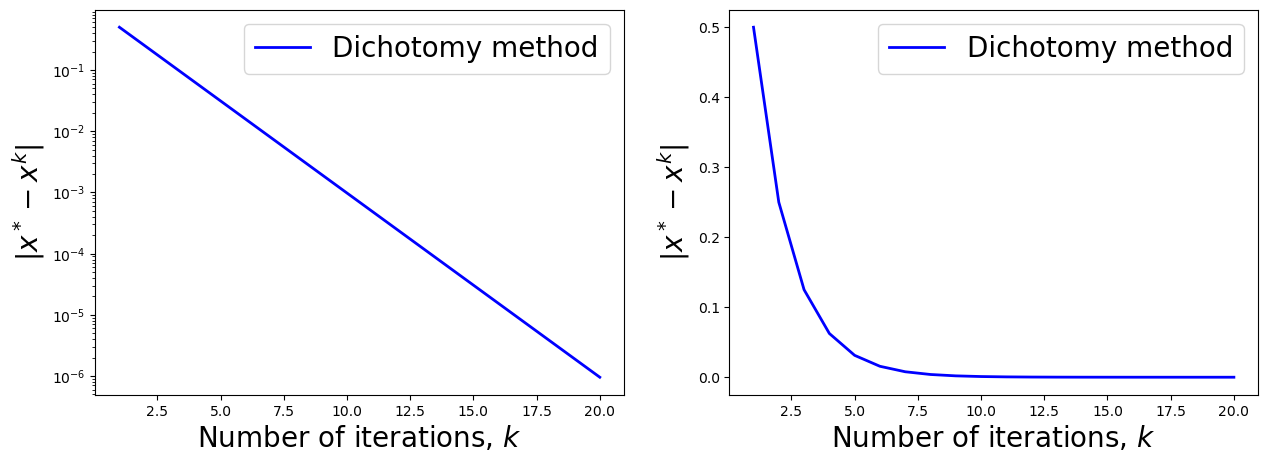

In [61]:
# Графики сходимости метода деления отрезка пополам

plt.figure(figsize=(15,5))

# линейный масштаб
plt.subplot(122)
plt.plot(np.arange(1, len(ans_d) + 1), np.abs(opt - np.array(ans_d)), color='blue', linewidth=2, label="Dichotomy method")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=20)

# логарифмический масштаб
plt.subplot(121)
plt.semilogy(np.arange(1, len(ans_d) + 1), np.abs(opt - np.array(ans_d)), color='blue', linewidth=2, label="Dichotomy method")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=20)

In [62]:
# Запуск метода золотого сечения

eps = 1e-3 # точность
N = 20  # максимальное количество итераций
ans_g, res_g = golden_section_search(a, b, function, eps, N, opt)
print("Метод золотого сечения достигает точности = {}".format(res_g), "в точке = {}".format(ans_g[-1]), "после N = {}".format(N), "итераций")

Метод золотого сечения достигает точности = 5.348165518004322e-05 в точке = 1.00005348165518 после N = 20 итераций


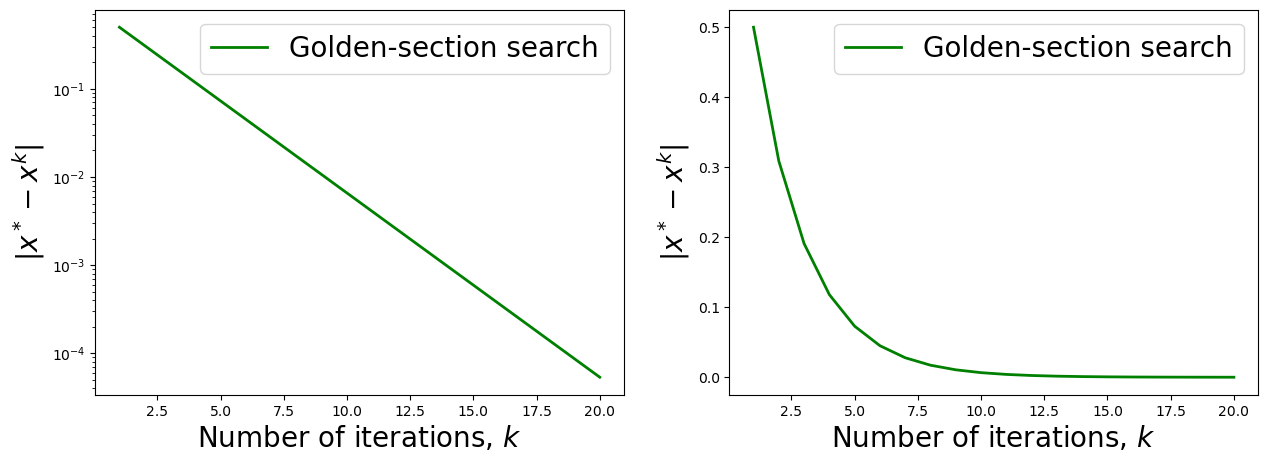

In [63]:
# Графики сходимости метода золотого сечения

plt.figure(figsize=(15,5))

# линейный масштаб
plt.subplot(122)
plt.plot(np.arange(1, len(ans_g) + 1), np.abs(opt - np.array(ans_g)), color='green', linewidth=2, label="Golden-section search")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=20)

# логарифмический масштаб
plt.subplot(121)
plt.semilogy(np.arange(1, len(ans_g) + 1), np.abs(opt - np.array(ans_g)), color='green', linewidth=2, label="Golden-section search")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=20)

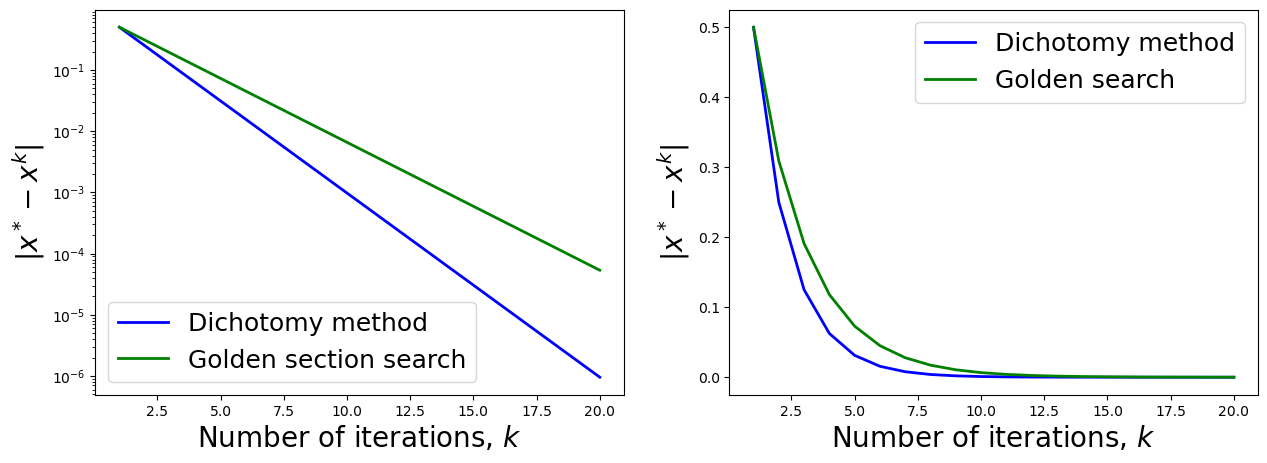

In [64]:
plt.figure(figsize=(15,5))

# линейный масштаб
plt.subplot(122)
plt.plot(np.arange(1, len(ans_d) + 1), np.abs(opt - np.array(ans_d)), color='blue', linewidth=2, label="Dichotomy method")
plt.plot(np.arange(1, len(ans_g) + 1), np.abs(opt - np.array(ans_g)), color='green', linewidth=2, label="Golden search")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=18)

# логарифмический масштаб
plt.subplot(121)
plt.semilogy(np.arange(1, len(ans_d) + 1), np.abs(opt - np.array(ans_d)), color='blue', linewidth=2, label="Dichotomy method")
plt.semilogy(np.arange(1, len(ans_g) + 1), np.abs(opt - np.array(ans_g)), color='green', linewidth=2, label="Golden section search")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=18)

Text(0, 0.5, 'f(x)')

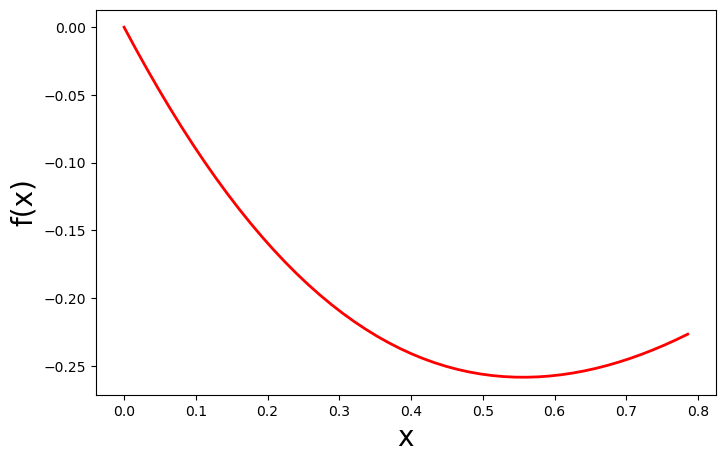

In [86]:
function = lambda x: np.log(1+x**2)-np.sin(x)
a = 0
b = np.pi/4
opt = 0.55 # решение x^*, находится с помощью солвера SCIPY (см.ниже)


plt.figure(figsize=(8,5))
plt.plot(np.linspace(a,b), function(np.linspace(a,b)), color='red', linewidth=2)
plt.xlabel("x", fontsize=20)
plt.ylabel("f(x)", fontsize=20)

In [87]:
bounds = Bounds([0], [np.pi/4])

# Определение функции
def f(x):
    return np.log(1+x**2)-np.sin(x)

# Минимизация
x_min = optimize.minimize(f, [b], bounds=bounds) # аргументы (фуникция, начальная точка, ограничения)
print(x_min)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -0.2584255600600623
        x: [ 5.560e-01]
      nit: 4
      jac: [-6.495e-07]
     nfev: 10
     njev: 5
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>


In [88]:
# Запуск метода деления отрезка пополам

eps = 1e-3 # точность
N = 20  # число итераций
ans_d, res_d = dichotomy_method(a, b, function, eps, N, opt)
print("Метод деления отрезка пополам достигает точности = {}".format(res_d), "в точке = {}".format(ans_d[-1]), "после N = {}".format(N), "итераций")

Метод деления отрезка пополам достигает точности = 0.0059684167390188225 в точке = 0.5559684167390189 после N = 20 итераций


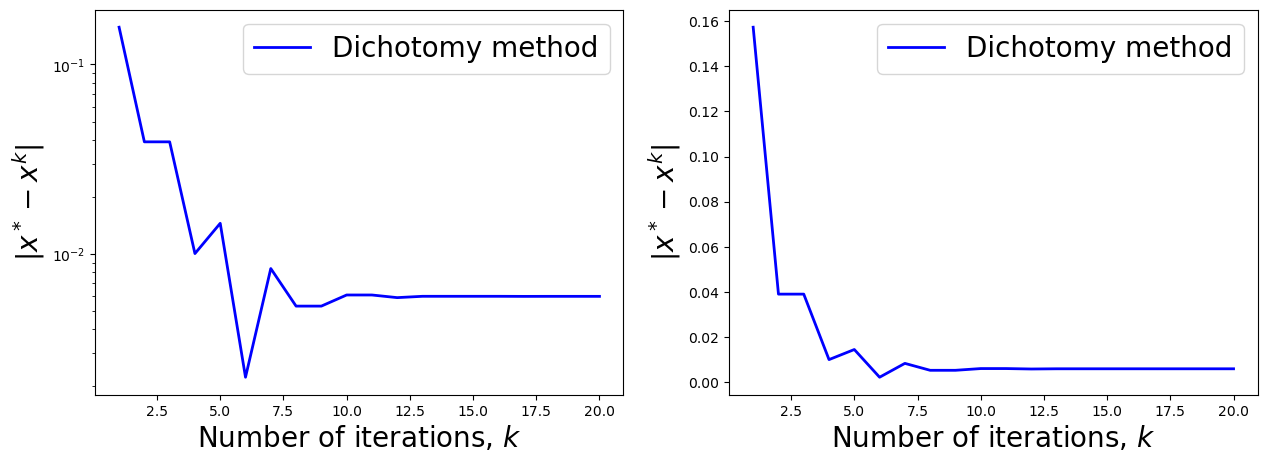

In [89]:
# Графики сходимости метода деления отрезка пополам

plt.figure(figsize=(15,5))

# линейный масштаб
plt.subplot(122)
plt.plot(np.arange(1, len(ans_d) + 1), np.abs(opt - np.array(ans_d)), color='blue', linewidth=2, label="Dichotomy method")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=20)

# логарифмический масштаб
plt.subplot(121)
plt.semilogy(np.arange(1, len(ans_d) + 1), np.abs(opt - np.array(ans_d)), color='blue', linewidth=2, label="Dichotomy method")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=20)

In [90]:
# Запуск метода золотого сечения

eps = 1e-3 # точность
N = 20  # максимальное количество итераций
ans_g, res_g = golden_section_search(a, b, function, eps, N, opt)
print("Метод золотого сечения достигает точности = {}".format(res_g), "в точке = {}".format(ans_g[-1]), "после N = {}".format(N), "итераций")

Метод золотого сечения достигает точности = 0.005960125641051528 в точке = 0.5559601256410516 после N = 20 итераций


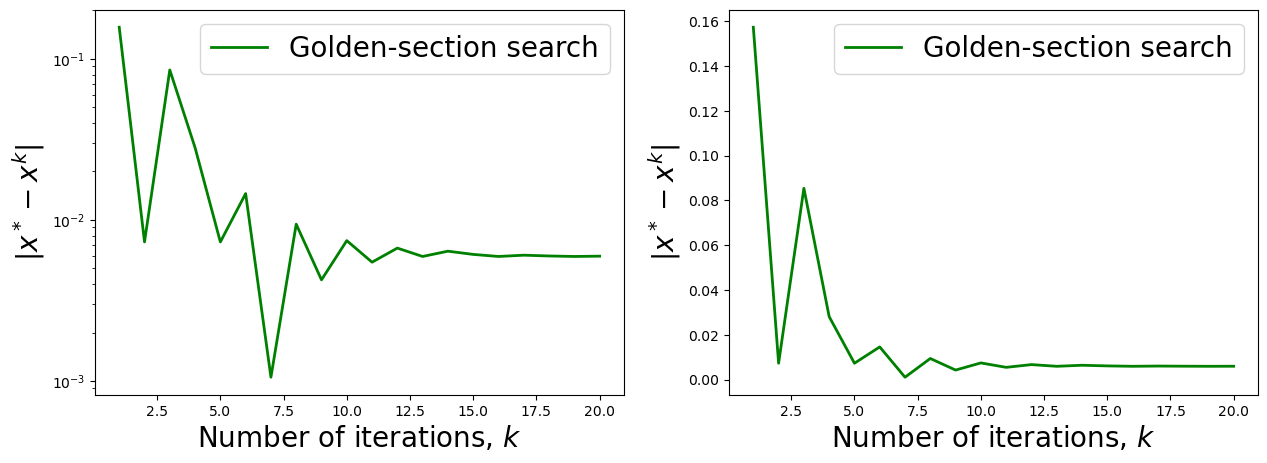

In [91]:
# Графики сходимости метода золотого сечения

plt.figure(figsize=(15,5))

# линейный масштаб
plt.subplot(122)
plt.plot(np.arange(1, len(ans_g) + 1), np.abs(opt - np.array(ans_g)), color='green', linewidth=2, label="Golden-section search")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=20)

# логарифмический масштаб
plt.subplot(121)
plt.semilogy(np.arange(1, len(ans_g) + 1), np.abs(opt - np.array(ans_g)), color='green', linewidth=2, label="Golden-section search")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=20)

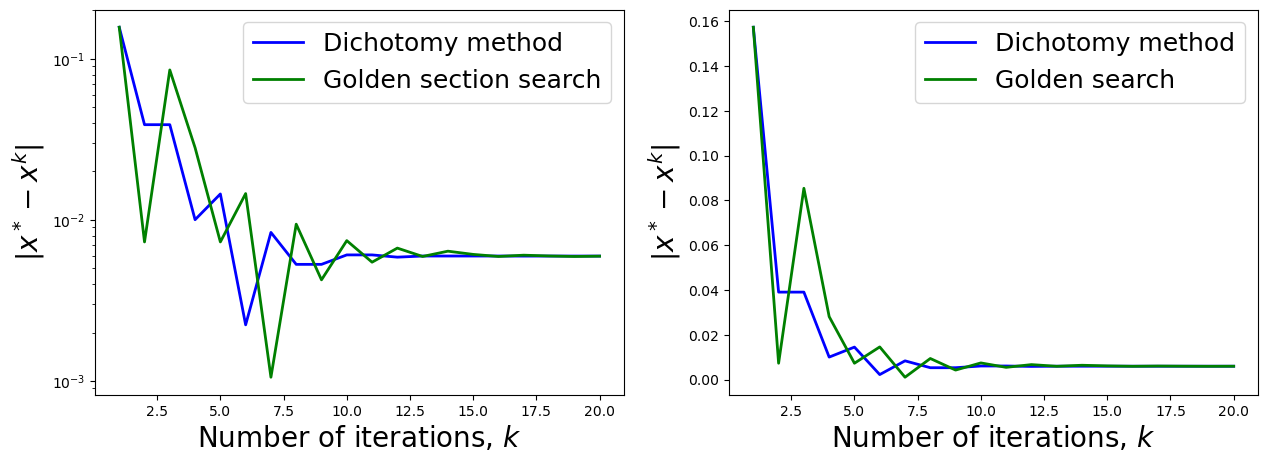

In [92]:
plt.figure(figsize=(15,5))

# линейный масштаб
plt.subplot(122)
plt.plot(np.arange(1, len(ans_d) + 1), np.abs(opt - np.array(ans_d)), color='blue', linewidth=2, label="Dichotomy method")
plt.plot(np.arange(1, len(ans_g) + 1), np.abs(opt - np.array(ans_g)), color='green', linewidth=2, label="Golden search")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=18)

# логарифмический масштаб
plt.subplot(121)
plt.semilogy(np.arange(1, len(ans_d) + 1), np.abs(opt - np.array(ans_d)), color='blue', linewidth=2, label="Dichotomy method")
plt.semilogy(np.arange(1, len(ans_g) + 1), np.abs(opt - np.array(ans_g)), color='green', linewidth=2, label="Golden section search")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=18)

# СВОЯ ФУНКЦИЯ

Text(0, 0.5, 'f(x)')

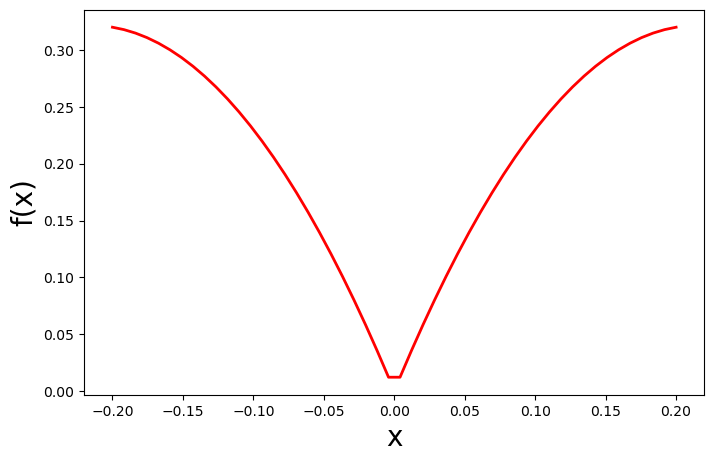

In [93]:
function = lambda x: np.abs(3*x)-7*np.sin(x**2)
a = -0.2
b = 0.2
opt = 0 # решение x^*, находится с помощью солвера SCIPY (см.ниже)


plt.figure(figsize=(8,5))
plt.plot(np.linspace(a,b), function(np.linspace(a,b)), color='red', linewidth=2)
plt.xlabel("x", fontsize=20)
plt.ylabel("f(x)", fontsize=20)

In [94]:
bounds = Bounds([-0.2],[0.2])
# Определение функции
def f(x):
    return np.abs(3*x)-7*np.sin(x**2)

# Минимизация
x_min = optimize.minimize(f, [b], bounds=bounds) # аргументы (фуникция, начальная точка, ограничения)
print(x_min)

  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: 5.554924518504291e-09
        x: [-1.852e-09]
      nit: 5
      jac: [ 1.889e+00]
     nfev: 140
     njev: 70
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>


In [95]:
# Запуск метода деления отрезка пополам

eps = 1e-3 # точность
N = 20  # число итераций
ans_d, res_d = dichotomy_method(a, b, function, eps, N, opt)
print("Метод деления отрезка пополам достигает точности = {}".format(res_d), "в точке = {}".format(ans_d[-1]), "после N = {}".format(N), "итераций")

Метод деления отрезка пополам достигает точности = 0.0 в точке = 0.0 после N = 20 итераций


/home/daniil/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


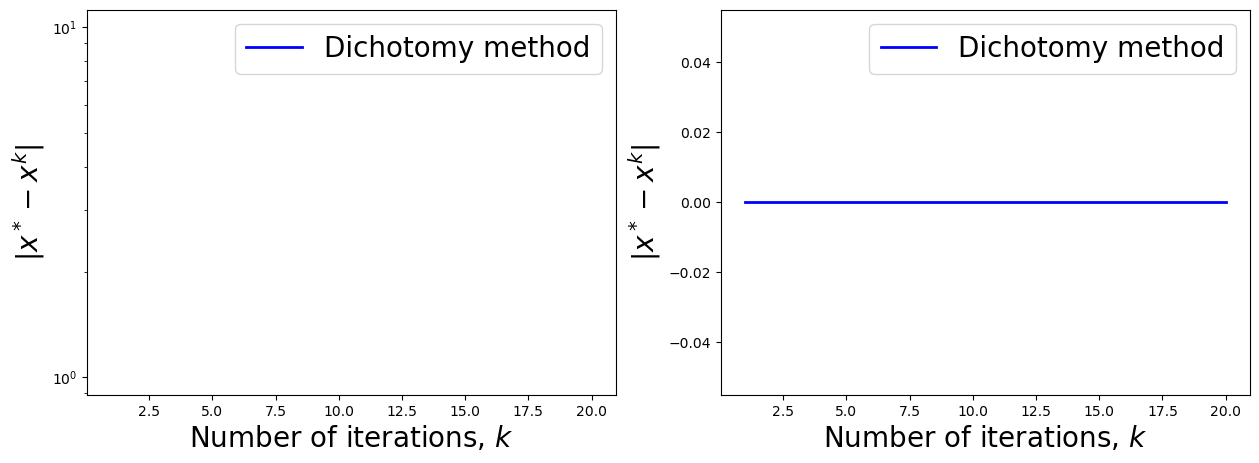

In [96]:
# Графики сходимости метода деления отрезка пополам

plt.figure(figsize=(15,5))

# линейный масштаб
plt.subplot(122)
plt.plot(np.arange(1, len(ans_d) + 1), np.abs(opt - np.array(ans_d)), color='blue', linewidth=2, label="Dichotomy method")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=20)

# логарифмический масштаб
plt.subplot(121)
plt.semilogy(np.arange(1, len(ans_d) + 1), np.abs(opt - np.array(ans_d)), color='blue', linewidth=2, label="Dichotomy method")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=20)

In [97]:
# Запуск метода золотого сечения

eps = 1e-3 # точность
N = 20  # максимальное количество итераций
ans_g, res_g = golden_section_search(a, b, function, eps, N, opt)
print("Метод золотого сечения достигает точности = {}".format(res_g), "в точке = {}".format(ans_g[-1]), "после N = {}".format(N), "итераций")

Метод золотого сечения достигает точности = 1.3221392270363145e-05 в точке = 1.3221392270363145e-05 после N = 20 итераций


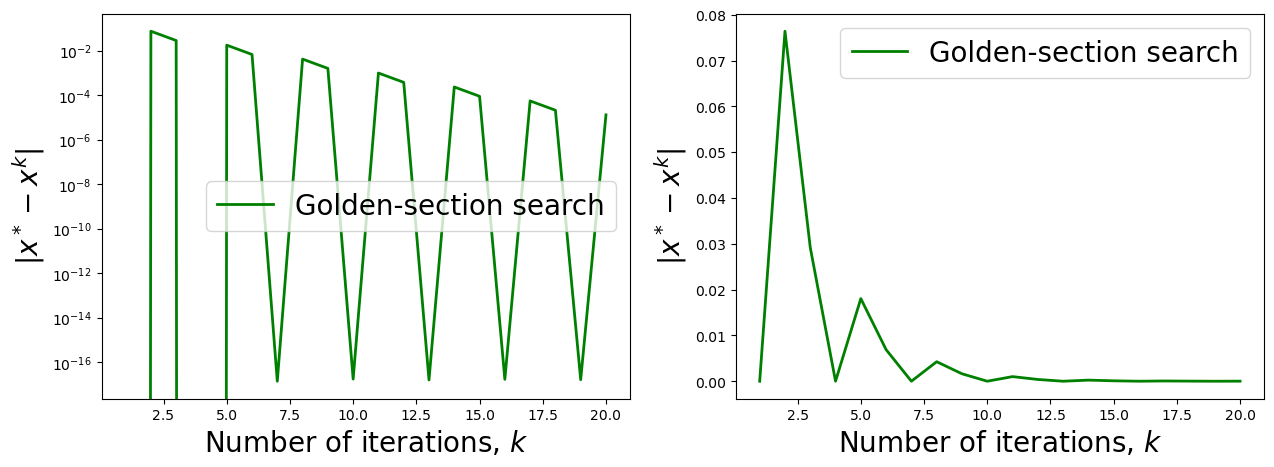

In [98]:
# Графики сходимости метода золотого сечения

plt.figure(figsize=(15,5))

# линейный масштаб
plt.subplot(122)
plt.plot(np.arange(1, len(ans_g) + 1), np.abs(opt - np.array(ans_g)), color='green', linewidth=2, label="Golden-section search")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=20)

# логарифмический масштаб
plt.subplot(121)
plt.semilogy(np.arange(1, len(ans_g) + 1), np.abs(opt - np.array(ans_g)), color='green', linewidth=2, label="Golden-section search")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=20)

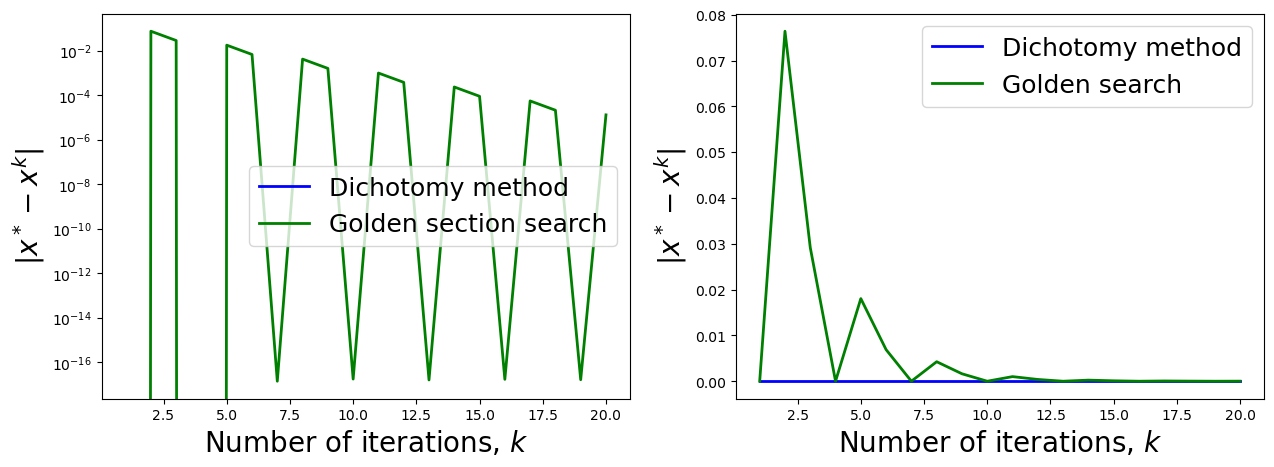

In [99]:
plt.figure(figsize=(15,5))

# линейный масштаб
plt.subplot(122)
plt.plot(np.arange(1, len(ans_d) + 1), np.abs(opt - np.array(ans_d)), color='blue', linewidth=2, label="Dichotomy method")
plt.plot(np.arange(1, len(ans_g) + 1), np.abs(opt - np.array(ans_g)), color='green', linewidth=2, label="Golden search")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=18)

# логарифмический масштаб
plt.subplot(121)
plt.semilogy(np.arange(1, len(ans_d) + 1), np.abs(opt - np.array(ans_d)), color='blue', linewidth=2, label="Dichotomy method")
plt.semilogy(np.arange(1, len(ans_g) + 1), np.abs(opt - np.array(ans_g)), color='green', linewidth=2, label="Golden section search")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("$|x^* - x^k|$", fontsize=20)
plt.legend(loc="best", fontsize=18)